
## Uber and Lyft Cab Prices
### Preprocessing Data and Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
cab = pd.read_csv("C:\\Data\\ITS\\Data Mining\\cab_rides.csv")
weather = pd.read_csv("C:\\Data\\ITS\\Data Mining\\weather.csv")

In [3]:
# date time variable correction
cab['date_time'] = pd.to_datetime(cab['time_stamp']/1000, unit='s')
weather['date_time'] = pd.to_datetime(weather['time_stamp'], unit='s')

In [4]:
# joining data between two tables
cab['join_date'] = cab.source.astype(str) +" - "+ cab.date_time.dt.date.astype("str") +" - "+ cab.date_time.dt.hour.astype("str")
weather['join_date'] = weather.location.astype(str) +" - "+ weather.date_time.dt.date.astype("str") +" - "+ weather.date_time.dt.hour.astype("str")

In [5]:
# merge two data sets based on location and time
merged = pd.merge(cab,weather,on='join_date')
merged.head()

,distance,cab_type,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,...,join_date,temp,location,clouds,pressure,rain,time_stamp_y,humidity,wind,date_time_y
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,Haymarket Square - 2018-12-16 - 8,39.36,Haymarket Square,0.39,1022.44,NaN,1544949901,0.74,8.14,2018-12-16 08:45:01
1,1.33,Lyft,1.544950e+12,Beacon Hill,Haymarket Square,7.0,1.0,0d468502-34b5-447f-be9f-acbb62176072,lyft,Lyft,...,Haymarket Square - 2018-12-16 - 8,39.36,Haymarket Square,0.39,1022.44,NaN,1544949901,0.74,8.14,2018-12-16 08:45:01
2,0.53,Lyft,1.544950e+12,North Station,Haymarket Square,27.5,1.0,2aa8d17e-4b13-4200-87db-db3eed73ca6b,lyft_luxsuv,Lux Black XL,...,Haymarket Square - 2018-12-16 - 8,39.36,Haymarket Square,0.39,1022.44,NaN,1544949901,0.74,8.14,2018-12-16 08:45:01
3,2.36,Lyft,1.544950e+12,Back Bay,Haymarket Square,7.0,1.0,4944c164-0463-47b9-96e1-15ffe8b9c7c9,lyft_line,Shared,...,Haymarket Square - 2018-12-16 - 8,39.36,Haymarket Square,0.39,1022.44,NaN,1544949901,0.74,8.14,2018-12-16 08:45:01
4,0.62,Uber,1.544950e+12,West End,Haymarket Square,10.5,1.0,b1c23003-39fb-4030-9961-4f3420b23907,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,Haymarket Square - 2018-12-16 - 8,39.36,Haymarket Square,0.39,1022.44,NaN,1544949901,0.74,8.14,2018-12-16 08:45:01


In [6]:
# check null value in data
merged.isnull().sum()

distance                  0
cab_type                  0
time_stamp_x              0
destination               0
source                    0
price                100494
surge_multiplier          0
id                        0
product_id                0
name                      0
date_time_x               0
join_date                 0
temp                      0
location                  0
clouds                    0
pressure                  0
rain                1018034
time_stamp_y              0
humidity                  0
wind                      0
date_time_y               0
dtype: int64

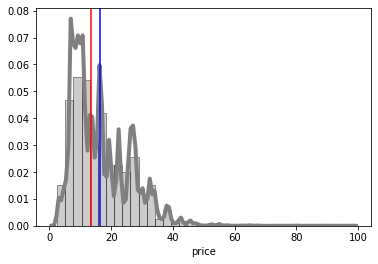

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(merged['price'], hist=True, kde=True, 
             bins=int(180/5), color = 'grey', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.axvline(merged['price'].mean(),color='blue') 
plt.axvline(merged['price'].median(),color='red')

In [9]:
# fill in missing values with estimation
merged['price'] = merged['price'].fillna(merged['price'].mean())
merged['rain'].fillna(0,inplace=True)
merged.isnull().sum()

distance            0
cab_type            0
time_stamp_x        0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
date_time_x         0
join_date           0
temp                0
location            0
clouds              0
pressure            0
rain                0
time_stamp_y        0
humidity            0
wind                0
date_time_y         0
dtype: int64

In [10]:
# binning data
bins = [-1,0.000001,0.8]
labels = ["no rain","rain"]
merged['rain'] = pd.cut(merged['rain'],bins=bins,labels=labels)
merged.head(3)

,distance,cab_type,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,...,join_date,temp,location,clouds,pressure,rain,time_stamp_y,humidity,wind,date_time_y
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,Haymarket Square - 2018-12-16 - 8,39.36,Haymarket Square,0.39,1022.44,no rain,1544949901,0.74,8.14,2018-12-16 08:45:01
1,1.33,Lyft,1.544950e+12,Beacon Hill,Haymarket Square,7.0,1.0,0d468502-34b5-447f-be9f-acbb62176072,lyft,Lyft,...,Haymarket Square - 2018-12-16 - 8,39.36,Haymarket Square,0.39,1022.44,no rain,1544949901,0.74,8.14,2018-12-16 08:45:01
2,0.53,Lyft,1.544950e+12,North Station,Haymarket Square,27.5,1.0,2aa8d17e-4b13-4200-87db-db3eed73ca6b,lyft_luxsuv,Lux Black XL,...,Haymarket Square - 2018-12-16 - 8,39.36,Haymarket Square,0.39,1022.44,no rain,1544949901,0.74,8.14,2018-12-16 08:45:01


In [11]:
# numerical variables only
new_merged = merged.select_dtypes([np.number])
new_merged.drop(['surge_multiplier'],axis=1,inplace=True)
new_merged.head(3)

C:\Users\asus\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,distance,time_stamp_x,price,temp,clouds,pressure,time_stamp_y,humidity,wind
0,0.44,1.544950e+12,5.0,39.36,0.39,1022.44,1544949901,0.74,8.14
1,1.33,1.544950e+12,7.0,39.36,0.39,1022.44,1544949901,0.74,8.14
2,0.53,1.544950e+12,27.5,39.36,0.39,1022.44,1544949901,0.74,8.14


In [12]:
# feature selection - correlation thresholds: remove features that are highly correlated with others
def find_correlation(df, thresh=0.9):    
    corrMatrix = df.corr()
    corrMatrix.loc[:,:] =  np.tril(corrMatrix, k=-1)
    already_in = set()
    result = []
    for col in corrMatrix:
        perfect_corr = corrMatrix[col][corrMatrix[col] > thresh].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

find_correlation(new_merged,thresh=0.9)

['time_stamp_x']

In [13]:
# remove variable
merged.drop(['time_stamp_y'],axis=1,inplace=True)

In [14]:
# feature selection - variance thresholds: remove features whose values don't change much from observation to observation
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold
thresholder = VarianceThreshold(0.1)
merged_hv = thresholder.fit_transform(new_merged)
merged_hv_df = pd.DataFrame(merged_hv)
merged_hv_df.head(3)

,0,1,2,3,4,5,6
0,0.44,1.544950e+12,5.0,39.36,1022.44,1.544950e+09,8.14
1,1.33,1.544950e+12,7.0,39.36,1022.44,1.544950e+09,8.14
2,0.53,1.544950e+12,27.5,39.36,1022.44,1.544950e+09,8.14


In [15]:
# remove variable
merged.drop(['humidity','clouds','date_time_y','location'],axis=1,inplace=True)
merged.head(3)

,distance,cab_type,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,date_time_x,join_date,temp,pressure,rain,wind
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,2018-12-16 08:46:40,Haymarket Square - 2018-12-16 - 8,39.36,1022.44,no rain,8.14
1,1.33,Lyft,1.544950e+12,Beacon Hill,Haymarket Square,7.0,1.0,0d468502-34b5-447f-be9f-acbb62176072,lyft,Lyft,2018-12-16 08:46:40,Haymarket Square - 2018-12-16 - 8,39.36,1022.44,no rain,8.14
2,0.53,Lyft,1.544950e+12,North Station,Haymarket Square,27.5,1.0,2aa8d17e-4b13-4200-87db-db3eed73ca6b,lyft_luxsuv,Lux Black XL,2018-12-16 08:46:40,Haymarket Square - 2018-12-16 - 8,39.36,1022.44,no rain,8.14


In [16]:
# convert variable
import datetime
merged['time'] = pd.to_datetime(merged['time_stamp_x'],unit='ms')
merged['hour']= merged['time'].dt.hour
merged.tail(3)

,distance,cab_type,time_stamp_x,destination,source,price,surge_multiplier,id,product_id,name,date_time_x,join_date,temp,pressure,rain,wind,time,hour
1263911,2.98,Uber,1.543390e+12,Theatre District,Boston University,31.5,1.0,ea309d5f-1c4f-4a8d-ac49-72fb9ccee4d4,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-11-28 07:26:40,Boston University - 2018-11-28 - 7,34.99,991.78,no rain,6.50,2018-11-28 07:26:40,7
1263912,2.98,Uber,1.543390e+12,Theatre District,Boston University,31.5,1.0,ea309d5f-1c4f-4a8d-ac49-72fb9ccee4d4,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-11-28 07:26:40,Boston University - 2018-11-28 - 7,35.01,991.70,no rain,5.47,2018-11-28 07:26:40,7
1263913,2.98,Uber,1.543390e+12,Theatre District,Boston University,31.5,1.0,ea309d5f-1c4f-4a8d-ac49-72fb9ccee4d4,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,2018-11-28 07:26:40,Boston University - 2018-11-28 - 7,34.89,991.57,no rain,6.32,2018-11-28 07:26:40,7


In [17]:
# statistics descriptive for numerical variables
merged_num = merged.select_dtypes([np.number])
round(merged_num.describe(),2)

,distance,time_stamp_x,price,surge_multiplier,temp,pressure,wind,hour
count,1263914.00,1.263914e+06,1263914.00,1263914.00,1263914.00,1263914.00,1263914.00,1263914.00
mean,2.19,1.543750e+12,16.53,1.01,39.50,1005.04,7.63,9.86
std,1.14,6.083567e+08,8.94,0.09,5.48,12.68,3.34,7.54
min,0.02,1.543210e+12,2.50,1.00,19.78,988.52,0.30,0.00
25%,1.27,1.543390e+12,9.50,1.00,37.34,993.96,5.15,2.00
50%,2.15,1.543450e+12,16.00,1.00,39.59,1001.72,8.44,10.00
75%,2.93,1.543800e+12,22.50,1.00,43.69,1014.57,10.23,16.00
max,7.86,1.545150e+12,97.50,3.00,55.06,1035.07,18.18,23.00


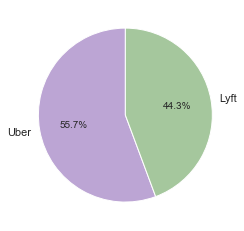

In [20]:
%matplotlib inline

nctype = [merged.cab_type[merged.cab_type=='Uber'].count(),merged.cab_type[merged.cab_type=='Lyft'].count()]
ctype = ['Uber','Lyft']
plt.pie(nctype,labels=ctype,startangle=90,colors=['#bca5d4','#a5c79d'], autopct ='%.1f%%')
plt.show()

# Uber gets a more rides compared to Lyft in this particular dataset

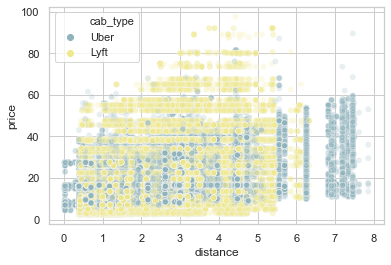

In [54]:
pvd = sns.scatterplot(x=merged.distance, y=merged.price, data=merged, hue=merged.cab_type, hue_order=ctype,alpha=0.2, palette=['#8eb3bd','#f0e98b'],legend='full')

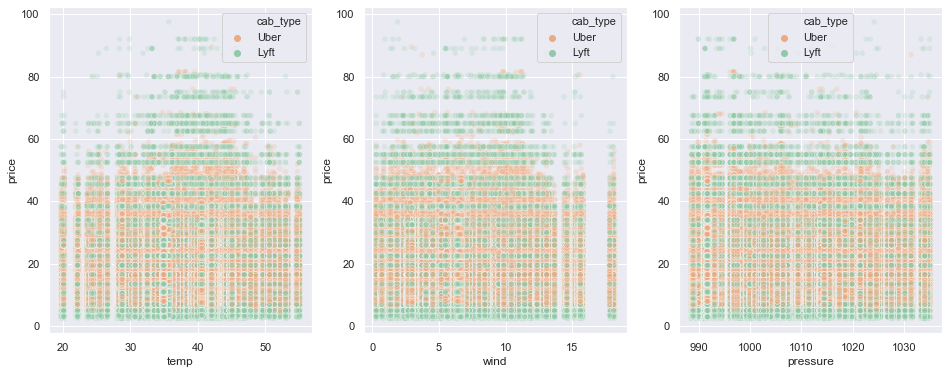

In [130]:
g, axes = plt.subplots (1,3, figsize=(16,6))
pvtemp = sns.scatterplot(x=merged.temp, y=merged.price, data=merged, hue=merged.cab_type, hue_order=ctype,alpha=0.2, palette=['#edaa80','#91c9a8'],legend='full',ax=axes[0])
pvwind= sns.scatterplot(x=merged.wind, y=merged.price, data=merged, hue=merged.cab_type, hue_order=ctype,alpha=0.2, palette=['#edaa80','#91c9a8'],legend='full',ax=axes[1])
pvpressure = sns.scatterplot(x=merged.pressure, y=merged.price, data=merged, hue=merged.cab_type, hue_order=ctype,alpha=0.2, palette=['#edaa80','#91c9a8'],legend='full',ax=axes[2])

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


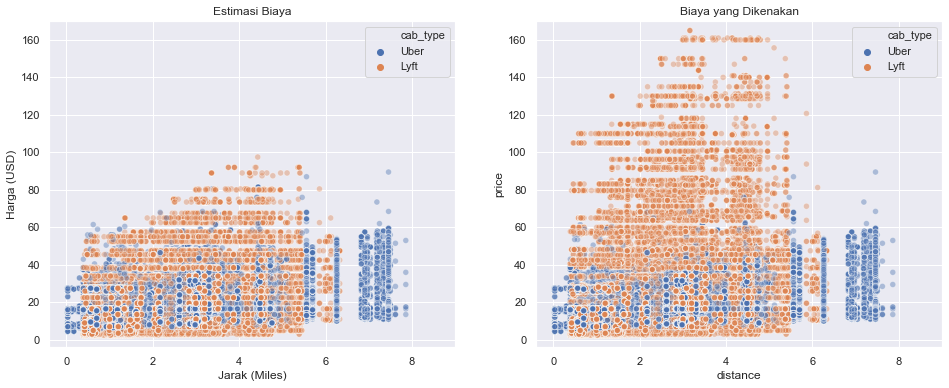

In [120]:
g, axes = plt.subplots (1,2, figsize=(16,6))

merged2=merged.copy()

for i in (list(merged2.index.values)):
    if merged2.cab_type[i]=='Uber': 
        pass
    elif (merged2.cab_type[i]=='Lyft') & (merged2.surge_multiplier[i]!=1.0):
        merged2.price[i]=(merged.price[i] * merged2.surge_multiplier[i])

g1 =sns.scatterplot(x=merged.distance,y=merged.price,data=merged, hue=merged.cab_type, hue_order=ctype,alpha=0.4, ax=axes[0], palette=['#8fb5ad','#c98d9a'])
g2 =sns.scatterplot(x=merged2.distance,y=merged2.price,data=merged2, hue=merged2.cab_type, hue_order=ctype, alpha=0.4,ax=axes[1],palette=['#8fb5ad','#c98d9a'])

g1.set(xlim=(-0.4, 9))
g1.set(ylim=(-4, 170))
g2.set(xlim=(-0.4, 9))
g2.set(ylim=(-4, 170))
g1.set(xlabel='Jarak (Miles)',ylabel='Harga (USD)')
g2.set(xlabel='Jarak (Miles)',ylabel='Harga (USD)')


axes[0].set_title('Estimasi Biaya')
axes[1].set_title('Biaya yang Dikenakan')

plt.ioff()

In [ ]:
g, axes = plt.subplots (1,2, figsize=(16,6))
loc = sns.countplot(x=merged.source, hue = merged.cab_type, hue_order = ctype, palette='coolwarm',ax=axes[0])
dest = sns.countplot(x=merged.destination, hue = merged.cab_type, hue_order = ctype, palette='coolwarm',ax=axes[1])
loc.set_title('Pick Up')
dest.set_title('Destination')
sns.set(font_scale=1)
plt.ioff()


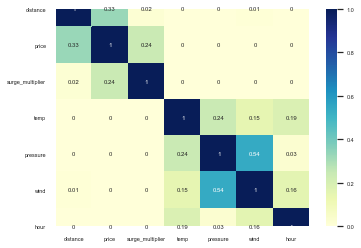

In [21]:
corr = round(merged_num.corr(),2)
sns.heatmap(corr.abs(), annot=True, square=True, cmap="YlGnBu")

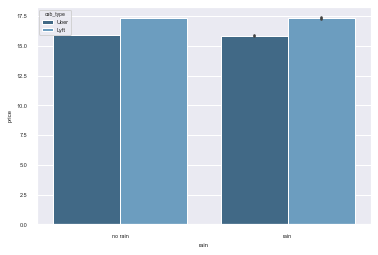

In [22]:
wvp = sns.barplot(x=merged.rain, y=merged.price, hue=merged.cab_type, hue_order=ctype, data=merged,palette='Blues_d')
sns.set(font_scale = 1)

[Text(0, 0.5, 'Jumlah Perjalanan')]

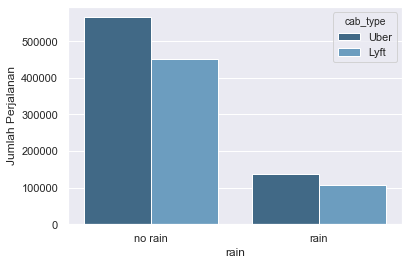

In [119]:
wvp = sns.countplot(x=merged.rain,  hue=merged.cab_type, hue_order=ctype, data=merged,palette='Blues_d')
wvp.set(ylabel='Jumlah Perjalanan')

[Text(0, 0.5, 'Jumlah Perjalanan')]

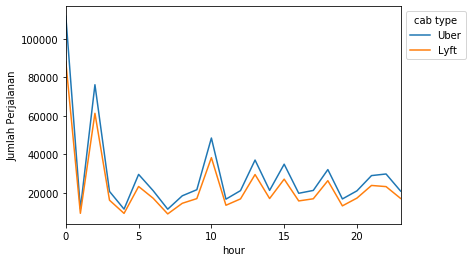

In [20]:
uber = merged[merged.cab_type=="Uber"]
lyft = merged[merged.cab_type=="Lyft"]

uu = uber.groupby('hour',as_index=False).size().plot(kind='line')
ll = lyft.groupby('hour',as_index=False).size().plot(kind='line')
plt.legend(title='cab type', loc='upper left', labels=['Uber','Lyft'],bbox_to_anchor=(1,1))
uu.set(ylabel='Jumlah Perjalanan')

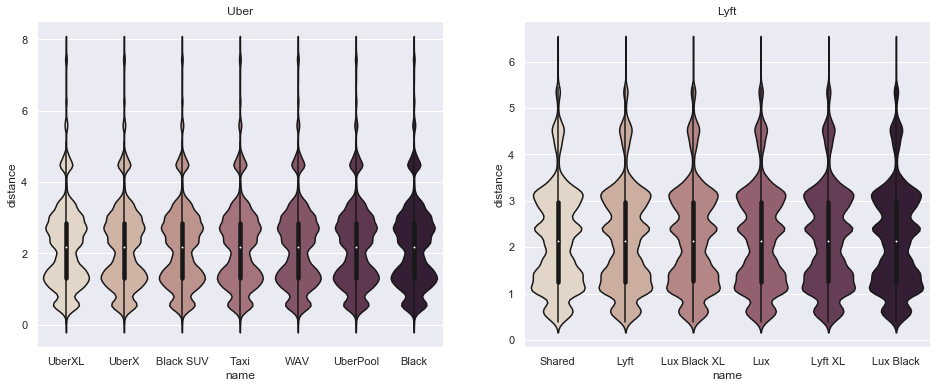

In [125]:
g, axes = plt.subplots (1,2, figsize=(16,6))
v1 = sns.violinplot(y=uber.distance, x=uber.name, palette="ch:.25",ax=axes[0])
v2 = sns.violinplot(y=lyft.distance, x=lyft.name, palette="ch:.25",ax=axes[1])
v1.set_title('Uber')
v2.set_title('Lyft')
plt.ioff()

In [25]:
merged.groupby('cab_type',as_index=False).agg({'price':np.mean, 'distance':np.mean, 'temp':np.mean})

,cab_type,price,distance,temp
0,Lyft,17.333392,2.183744,39.498194
1,Uber,15.891444,2.191278,39.498135
